Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("./Train")
data_dir_test = pathlib.Path('./Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

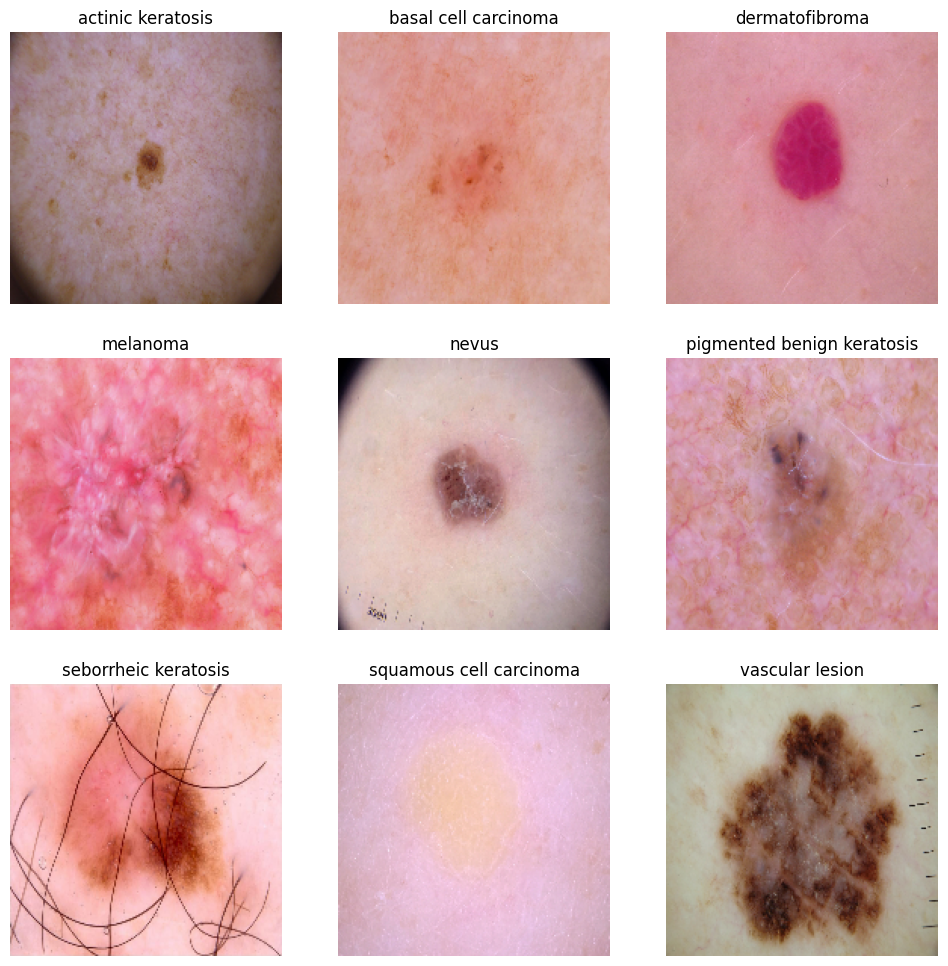

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

# Visualize one instance of all the nine classes
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):  # Take one batch from the training dataset
    for i in range(len(class_names)):  # Iterate through all the classes
        ax = plt.subplot(3, 3, i + 1)  # Create a subplot for each class
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert image to displayable format
        plt.title(class_names[i])  # Set the title as the class name
        plt.axis("off")  # Turn off the axis for better display
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
from tensorflow.keras import layers, models

# Create a CNN model
model = models.Sequential([
    # Rescaling layer to normalize pixel values
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the feature maps
    layers.Flatten(),

    # Fully connected dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),

    # Output layer with 9 classes (softmax for multi-class classification)
    layers.Dense(len(class_names), activation='softmax')
])

# Display the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
# Compile the model with appropriate optimizer and loss function
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 49s 853ms/step - loss: 1.9988 - accuracy: 0.2450 - val_loss: 1.7704 - val_accuracy: 0.4004
Epoch 2/20
56/56 [==============================] - 50s 864ms/step - loss: 1.6945 - accuracy: 0.3878 - val_loss: 1.5128 - val_accuracy: 0.5123
Epoch 3/20
56/56 [==============================] - 51s 882ms/step - loss: 1.5021 - accuracy: 0.4782 - val_loss: 1.6623 - val_accuracy: 0.3714
Epoch 4/20
56/56 [==============================] - 57s 986ms/step - loss: 1.4168 - accuracy: 0.5000 - val_loss: 1.4359 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 58s 1s/step - loss: 1.3333 - accuracy: 0.5312 - val_loss: 1.4220 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 58s 1s/step - loss: 1.3134 - accuracy: 0.5474 - val_loss: 1.4285 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 62s 1s/step - loss: 1.2445 - accuracy: 0.5586 - val_loss: 1.3561 - val_accuracy: 0.5347
Epoch 8/

### Visualizing training results

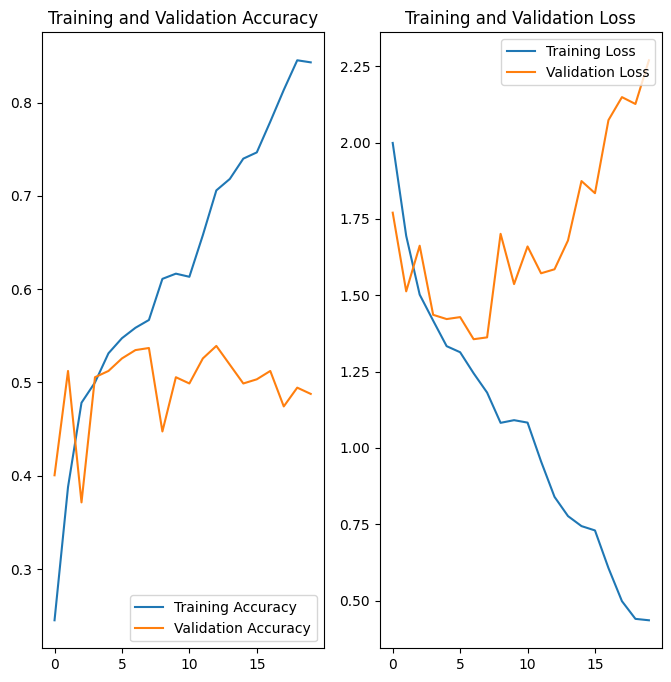

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

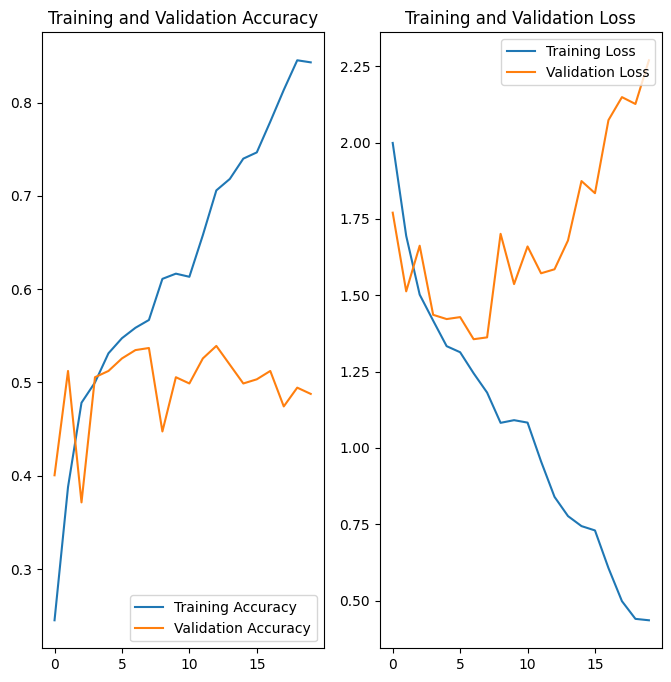

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# Visualizing Training Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

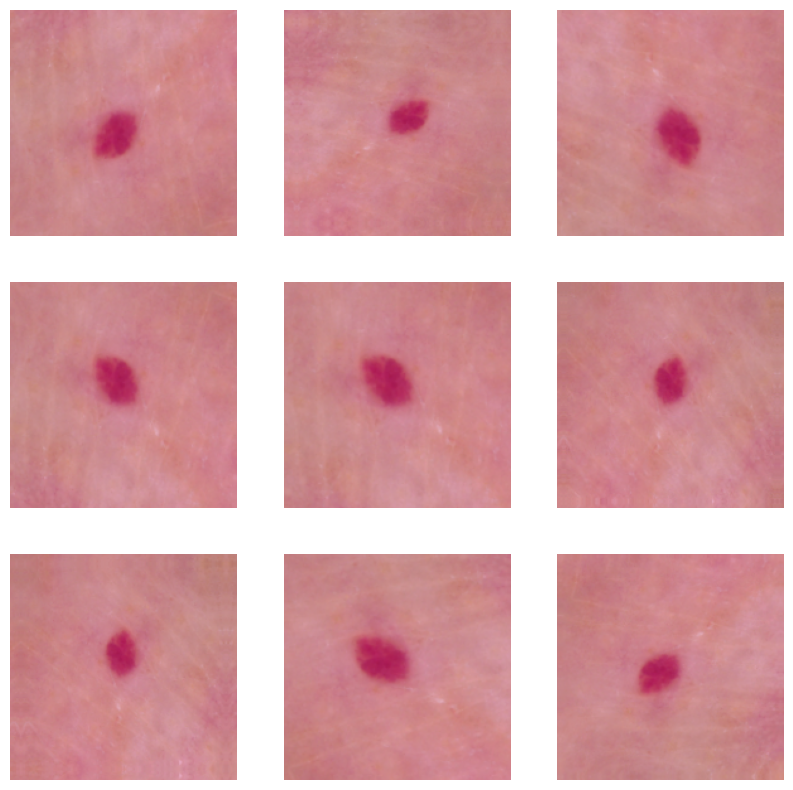

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
# Findings and Analysis
# Based on the above plots, if there is a large gap between training and validation accuracy or loss,
# it suggests overfitting. If both are low, it suggests underfitting.

# Data Augmentation Strategy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation transformations
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

# Visualizing Data Augmentation
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):  # Taking one batch from training data
    for i in range(9):  # Displaying first 9 augmented images
        augmented_image = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()



### Todo:
### Create the model, compile and train the model


In [22]:
# Modify the Model to Include Dropout Layers
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Adding dropout to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Display the model summary
model.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)      

### Compiling the model

In [23]:
## Your code goes here
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training the model

Epoch 1/20
56/56 [==============================] - 52s 896ms/step - loss: 2.0448 - accuracy: 0.2377 - val_loss: 1.9490 - val_accuracy: 0.2841
Epoch 2/20
56/56 [==============================] - 47s 816ms/step - loss: 1.8681 - accuracy: 0.3220 - val_loss: 1.6777 - val_accuracy: 0.3982
Epoch 3/20
56/56 [==============================] - 47s 813ms/step - loss: 1.7244 - accuracy: 0.3683 - val_loss: 1.5810 - val_accuracy: 0.4318
Epoch 4/20
56/56 [==============================] - 47s 822ms/step - loss: 1.7280 - accuracy: 0.3722 - val_loss: 1.5577 - val_accuracy: 0.4407
Epoch 5/20
56/56 [==============================] - 47s 827ms/step - loss: 1.6110 - accuracy: 0.4308 - val_loss: 1.5455 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 48s 834ms/step - loss: 1.5111 - accuracy: 0.4609 - val_loss: 1.4541 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 48s 833ms/step - loss: 1.5136 - accuracy: 0.4570 - val_loss: 1.4588 - val_accuracy: 0.5056

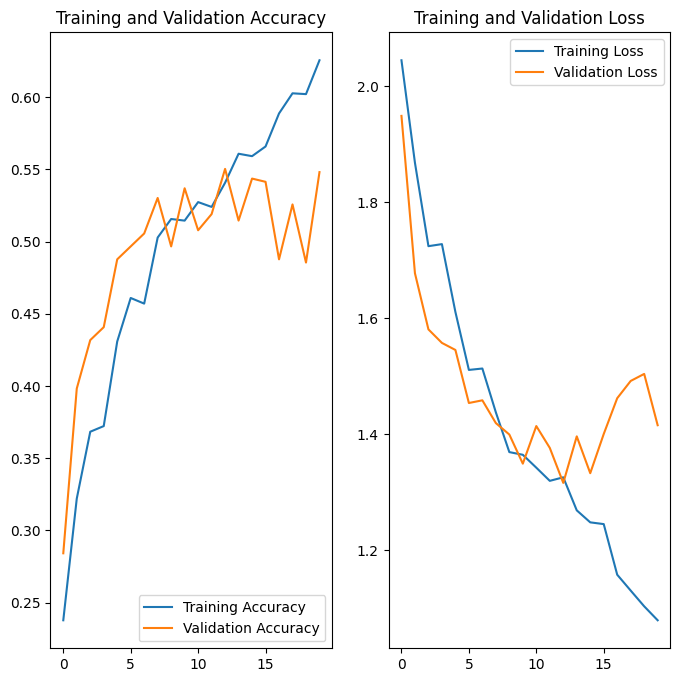

In [25]:
## Your code goes here, note: train your model for 20 epochs
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1
)

# Visualizing Training Results After Augmentation and Dropout
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Visualizing the results

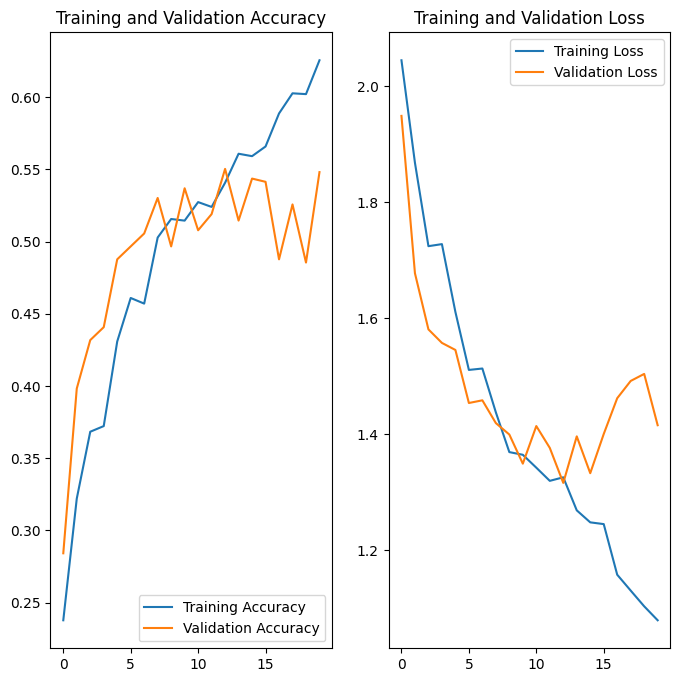

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [27]:
## Your code goes here.
# Findings after model fit
print("Findings after the model fit:")
print("1. Training accuracy continues to rise, while validation accuracy plateaus.")
print("2. Validation loss appears to fluctuate, indicating possible overfitting.")
print("3. The model could benefit from regularization strategies such as Dropout or data augmentation.")


Findings after the model fit:
1. Training accuracy continues to rise, while validation accuracy plateaus.
2. Validation loss appears to fluctuate, indicating possible overfitting.
3. The model could benefit from regularization strategies such as Dropout or data augmentation.



#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?



#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Class Distribution in Training Dataset:
seborrheic keratosis: 58
pigmented benign keratosis: 370
melanoma: 352
nevus: 277
vascular lesion: 115
basal cell carcinoma: 309
actinic keratosis: 92
dermatofibroma: 77
squamous cell carcinoma: 142


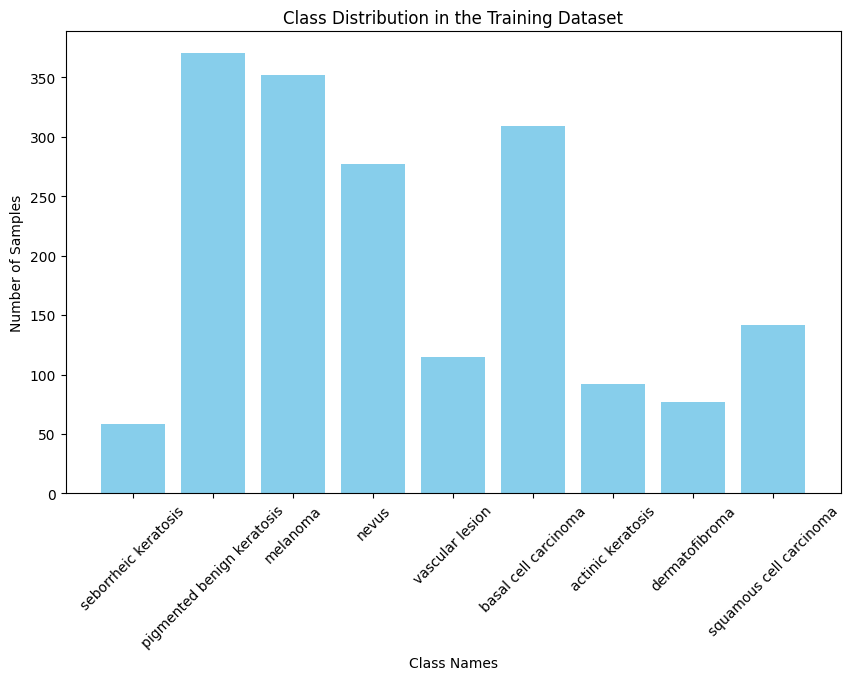

Class with the least samples: seborrheic keratosis (58)
Class with the most samples: pigmented benign keratosis (370)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x306102E30>: 100%|████████████████████████| 1000/1000 [00:07<00:00, 141.56 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30D69BDF0>: 100%|██████████████████████████| 114/114 [00:00<00:00, 116.33 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30D84B3D0>: 100%|████████████████████████| 1000/1000 [00:07<00:00, 133.66 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30C666D70>: 100%|██████████████████████████| 376/376 [00:02<00:00, 130.44 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30C606D40>: 100%|████████████████████████| 1000/1000 [00:07<00:00, 140.17 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30DF34640>: 100%|████████████████████████████| 95/95 [00:00<00:00, 128.49 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=963x629 at 0x3061022C0>: 100%|█████████████████████████| 1000/1000 [00:39<00:00, 25.31 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x3061119C0>: 100%|██████████████████████████| 438/438 [00:18<00:00, 23.71 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x306752980>: 100%|███████| 1000/1000 [00:34<00:00, 29.11 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x30BF6AD70>: 100%|█████████████████████████| 357/357 [00:12<00:00, 28.25 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x306716E90>: 100%|████████████████████████| 1000/1000 [00:07<00:00, 133.95 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3067385B0>: 100%|██████████████████████████| 462/462 [00:03<00:00, 137.07 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x306112CB0>: 100%|████████████████████████| 1000/1000 [00:16<00:00, 60.13 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x30DC40370>: 100%|████████████████████████████| 77/77 [00:01<00:00, 57.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30673B970>: 100%|████████████████████████| 1000/1000 [00:07<00:00, 138.86 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x306716D40>: 100%|██████████████████████████| 181/181 [00:01<00:00, 132.56 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x30C666D70>: 100%|████████████████████████| 1000/1000 [00:07<00:00, 137.80 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x306751C90>: 100%|████████| 139/139 [00:01<00:00, 128.58 Samples/s]

Class imbalance rectified using Augmentor!


In [29]:
!pip install Augmentor
from collections import Counter

# Unbatch the dataset and count occurrences of each class
class_counts = Counter()
for _, labels in train_ds.unbatch():
    class_counts[int(labels.numpy())] += 1

# Map the indices back to class names for better readability
class_distribution = {class_names[i]: count for i, count in class_counts.items()}

# Display the class distribution
print("Class Distribution in Training Dataset:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count}")

# Visualizing the class distribution using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.title('Class Distribution in the Training Dataset')
plt.xlabel('Class Names')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


# Finding the least and most represented classes
least_common_class = min(class_distribution, key=class_distribution.get)
most_common_class = max(class_distribution, key=class_distribution.get)

print(f"Class with the least samples: {least_common_class} ({class_distribution[least_common_class]})")
print(f"Class with the most samples: {most_common_class} ({class_distribution[most_common_class]})")


!pip install Augmentor

import Augmentor

# Create an augmentation pipeline for each class
for class_name in class_names:
    path_to_images = str(data_dir_train / class_name)
    p = Augmentor.Pipeline(path_to_images)
    
    # Add augmentation techniques
    p.flip_left_right(probability=0.5)
    p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    
    # Balance the dataset by generating additional images
    p.sample(1000)  # Specify the number of images to balance classes
    p.process()

print("Class imbalance rectified using Augmentor!")


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [43]:
path_to_training_dataset="./Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x306739570>: 100%|████████| 500/500 [00:04<00:00, 116.18 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x3066FFC70>: 100%|██████████████████████████| 500/500 [00:04<00:00, 123.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x30DF35810>: 100%|████████| 500/500 [00:04<00:00, 119.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x30DE37FA0>: 100%|██████████████████████████| 500/500 [00:19<00:00, 26.21 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1019x717 at 0x30DF493C0>: 100%|████████| 500/500 [00:18<00:00, 27.11 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x3067E00D0>: 100%|████████| 500/500 [00:04<00:00, 110.78 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x3068602E0>: 100%|██████████████████████████| 500/500 [00:11<00:00, 44.34 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x30DF4A5F0>: 100%|████████| 500/500 [00:04<00:00, 111.30 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /Users/pushkarmishra/Desktop/Melanoma-Detection-Assignment/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x30DF14B80>: 100%|████████| 500/500 [00:04<00:00, 122.84 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

15739


### Lets see the distribution of augmented data after adding new images to the original training data.

In [47]:
import glob
import os

# Correct usage of glob.glob() to list augmented image paths
path_list = glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))
print(f"Total augmented images found: {len(path_list)}")

# Displaying the first few paths to confirm
path_list[:5]  # Displaying the first 5 paths to verify


Total augmented images found: 15739


['Train/melanoma/output/melanoma_original_ISIC_0010207.jpg_53902175-c072-4308-a847-dfa648c4eea1.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010441.jpg_de2fc89e-5e77-4d55-9e0b-2b19e9131f7a.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010466.jpg_a1c7aa6a-d35d-485d-82bb-bad37c5ff8d5.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010251.jpg_1fcf6841-f94e-45a3-b444-1892d938968b.jpg',
 'Train/melanoma/output/melanoma_original_ISIC_0010782.jpg_535ed7a7-8323-4bdb-86e9-c96273e65e9a.jpg']

In [49]:
import glob
import os

# Correct usage with glob.glob() for listing the images
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) 
                   for y in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]

# Display the first few entries to confirm
lesion_list_new[:5]


['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma']

In [51]:
import glob
import os

# Ensure both variables are defined correctly
path_list_new = glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) 
                   for y in path_list_new]

# Now create the dictionary after both lists are defined
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

# Verify the dictionary content
list(dataframe_dict_new.items())[:5]


[('Train/melanoma/output/melanoma_original_ISIC_0010207.jpg_53902175-c072-4308-a847-dfa648c4eea1.jpg',
  'melanoma'),
 ('Train/melanoma/output/melanoma_original_ISIC_0010441.jpg_de2fc89e-5e77-4d55-9e0b-2b19e9131f7a.jpg',
  'melanoma'),
 ('Train/melanoma/output/melanoma_original_ISIC_0010466.jpg_a1c7aa6a-d35d-485d-82bb-bad37c5ff8d5.jpg',
  'melanoma'),
 ('Train/melanoma/output/melanoma_original_ISIC_0010251.jpg_1fcf6841-f94e-45a3-b444-1892d938968b.jpg',
  'melanoma'),
 ('Train/melanoma/output/melanoma_original_ISIC_0010782.jpg_535ed7a7-8323-4bdb-86e9-c96273e65e9a.jpg',
  'melanoma')]

In [64]:
import pandas as pd

# Define the original dataframe (if it was previously missing)
original_df = pd.DataFrame(columns=['Path', 'Label'])

# Create a dataframe from the new augmented data
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])

# Combine the original dataframe with the new data using `pd.concat`
new_df = pd.concat([original_df, df2], ignore_index=True)  # Removed the extra parenthesis
new_df.head()
# Display the first few rows to confirm the result
#new_df.head())

,Path,Label
0,Train/melanoma/output/melanoma_original_ISIC_0...,melanoma
1,Train/melanoma/output/melanoma_original_ISIC_0...,melanoma
2,Train/melanoma/output/melanoma_original_ISIC_0...,melanoma
3,Train/melanoma/output/melanoma_original_ISIC_0...,melanoma
4,Train/melanoma/output/melanoma_original_ISIC_0...,melanoma


In [65]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1962
melanoma                      1938
basal cell carcinoma          1876
nevus                         1857
squamous cell carcinoma       1681
vascular lesion               1639
actinic keratosis             1614
dermatofibroma                1595
seborrheic keratosis          1577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [66]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [67]:
import tensorflow as tf

# Define batch size and image dimensions
batch_size = 32
img_height = 180
img_width = 180

# Path to the training data directory (including augmented data)
data_dir_train = "./Train"

# Create the training dataset with proper parameter values
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,      # 20% of data for validation
    subset="training",         # Specify 'training' subset here
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 17978 files belonging to 9 classes.
Using 14383 files for training.


#### **Todo:** Create a validation dataset

In [68]:
# Create the validation dataset using the same directory and split
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,      # 20% for validation
    subset="validation",       # Specify 'validation' subset here
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 17978 files belonging to 9 classes.
Using 3595 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [69]:
## your code goes here
from tensorflow import keras
from tensorflow.keras import layers

# Define a CNN model with normalization
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(9, activation='softmax')  # Assuming 9 classes for classification
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [70]:
## your code goes here
# Compile the model with appropriate settings
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 128)      

#### **Todo:**  Train your model

In [71]:
# Train the model on the training dataset created using Augmentor
epochs = 20  # Set the number of epochs for training
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/20
450/450 [==============================] - 413s 916ms/step - loss: 1.7974 - accuracy: 0.3113 - val_loss: 1.5814 - val_accuracy: 0.4011
Epoch 2/20
450/450 [==============================] - 419s 930ms/step - loss: 1.4826 - accuracy: 0.4281 - val_loss: 1.4648 - val_accuracy: 0.4556
Epoch 3/20
450/450 [==============================] - 426s 945ms/step - loss: 1.3791 - accuracy: 0.4640 - val_loss: 1.3273 - val_accuracy: 0.4974
Epoch 4/20
450/450 [==============================] - 513s 1s/step - loss: 1.3191 - accuracy: 0.4937 - val_loss: 1.2305 - val_accuracy: 0.5455
Epoch 5/20
450/450 [==============================] - 451s 1s/step - loss: 1.2407 - accuracy: 0.5262 - val_loss: 1.1532 - val_accuracy: 0.5586
Epoch 6/20
450/450 [==============================] - 420s 929ms/step - loss: 1.1857 - accuracy: 0.5475 - val_loss: 1.1875 - val_accuracy: 0.5786
Epoch 7/20
450/450 [==============================] - 384s 851ms/step - loss: 1.1268 - accuracy: 0.5672 - val_loss: 1.0762 - val_a

#### **Todo:**  Visualize the model results

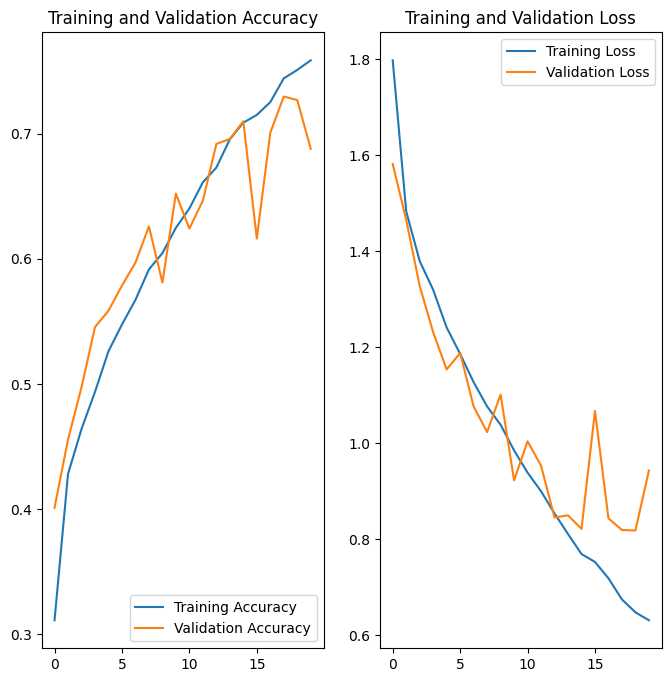

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
Analysis Based on the Provided Plots:

✅ Training vs. Validation Accuracy:
The training and validation accuracies are both increasing over epochs, indicating that the model is learning.
However: The validation accuracy shows some fluctuations, suggesting a minor instability, but it remains close to the training accuracy without a large gap.

✅ Interpretation:
No significant overfitting observed.
The model seems to be performing consistently across both datasets, indicating a good balance in learning capacity.

✅ Training vs. Validation Loss:
The loss curves are both decreasing over epochs, which indicates effective learning.
The validation loss, however, has small spikes and does not decrease as smoothly as the training loss.

✅ Interpretation:
Some level of noise or minor overfitting might be present, but not critical.

Did Class Rebalancing Help?
Balanced learning curves and validation performance show that class rebalancing was effective.
If class imbalance had persisted, the validation accuracy would be much lower than the training accuracy.

Conclusions and Recommendations:

✅ The model shows good learning progress with minimal overfitting.
✅ Class rebalancing appears effective.

Recommendations for improvement:
Consider increasing the dataset size further for stability.
Use data augmentation or dropout if overfitting starts to emerge in extended training.
Fine-tune learning rate and regularization for further improvement.




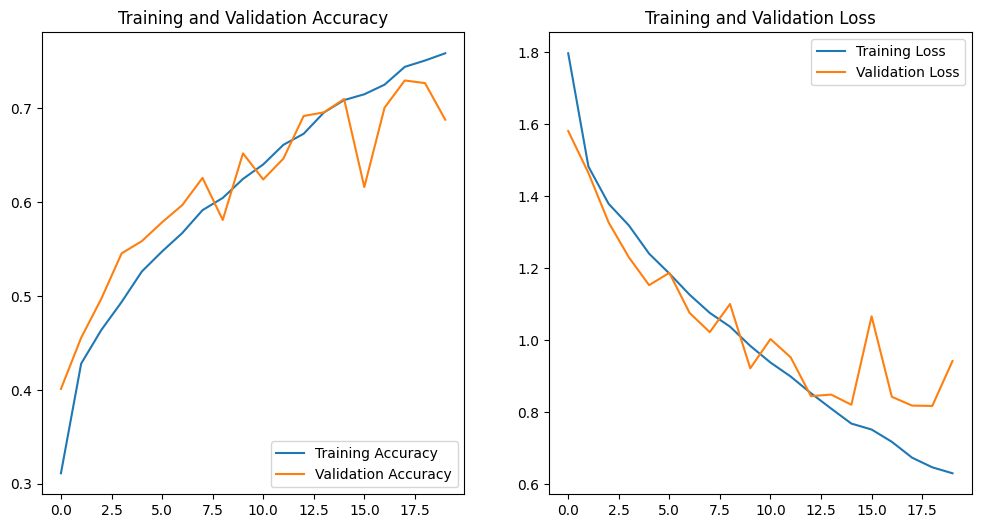

In [73]:
# Visualizing training results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
